<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch. In this lab, you will create a machine learning pipeline to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory Data Analysis and determine Training Labels

- create a column for the class
- Standardize the data
- Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

- Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [1]:
# !pip install numpy
# !pip install pandas
# !pip install seaborn
# !pip install scikit-learn

We will import the following libraries for the lab


In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd

# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np

# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt

# Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

# Preprocessing allows us to standarsize our data
from sklearn import preprocessing

# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split

# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV

# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression

# Support Vector Machine classification algorithm
from sklearn.svm import SVC

# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier

# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [3]:
def plot_confusion_matrix(y, y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax)
    # annot=True to annotate cells
    ax.set_xlabel("Predicted labels")
    ax.set_ylabel("True labels")
    ax.set_title("Confusion Matrix")
    ax.xaxis.set_ticklabels(["did not land", "land"])
    ax.yaxis.set_ticklabels(["did not land", "landed"])
    plt.show()

## Load the dataframe


Load the data


In [4]:
data = pd.read_csv(
    "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
)

In [5]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [6]:
X = pd.read_csv(
    "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"
)

In [7]:
X.head(5)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


## TASK 1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code> then
assign it to the variable <code>Y</code>,make sure the output is a Pandas series (only one bracket df\['name of column']).


In [8]:
Y = data["Class"].to_numpy()

## TASK 2


Standardize the data in <code>X</code> then reassign it to the variable <code>X</code> using the transform provided below.


In [9]:
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)
X[0:5]

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01,
        -1.57589457e+00, -9.73440458e-01, -1.05999788e-01,
        -1.05999788e-01, -6.54653671e-01, -1.05999788e-01,
        -5.51677284e-01,  3.44342023e+00, -1.85695338e-01,
        -3.33333333e-01, -1.05999788e-01, -2.42535625e-01,
        -4.29197538e-01,  7.97724035e-01, -5.68796459e-01,
        -4.10890702e-01, -4.10890702e-01, -1.50755672e-01,
        -7.97724035e-01, -1.50755672e-01, -3.92232270e-01,
         9.43398113e+00, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.50755672e-01, -1.05999788e-01,
        -1.05999788e-01, -1.05999788e-01, -1.05999788e-01,
        -1.05999788e-01, -1.50755672e-01, -1.05999788e-0

We split the data into training and testing data using the function <code>train_test_split</code>. The training data is divided into validation data, a second set used for training data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK 3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to 0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

In [11]:
X_test.shape

(18, 83)

we can see we only have 18 test samples.


In [12]:
Y_test.shape

(18,)

## TASK 4


Create a logistic regression object then create a GridSearchCV object <code>logreg_cv</code> with cv = 10. Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [13]:
# parameters = {"C": [0.01, 0.1, 1], "penalty": ["l2"], "solver": ["lbfgs"]}

In [14]:
parameters = {
    "C": [0.01, 0.1, 1],
    "penalty": ["l2"],
    "solver": ["lbfgs"],
}  # l2 ridge
lr = LogisticRegression()

logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)
print("Tuned Hyperparameters : ", logreg_cv.best_params_)
print("Accuracy : ", logreg_cv.best_score_)

Tuned Hyperparameters :  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy :  0.8035714285714285


We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [15]:
print("tuned hpyerparameters :(best parameters) ", logreg_cv.best_params_)
print("accuracy :", logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8035714285714285


## TASK 5


Calculate the accuracy on the test data using the method <code>score</code>:


In [16]:
# Calculate the accuracy on the test data using the method 'score'
logreg_acc = logreg_cv.score(X_test, Y_test)
print("Test set accuracy of best hyperparameter tuning is: ", logreg_acc)

Test set accuracy of best hyperparameter tuning is:  0.9444444444444444


Lets look at the confusion matrix:


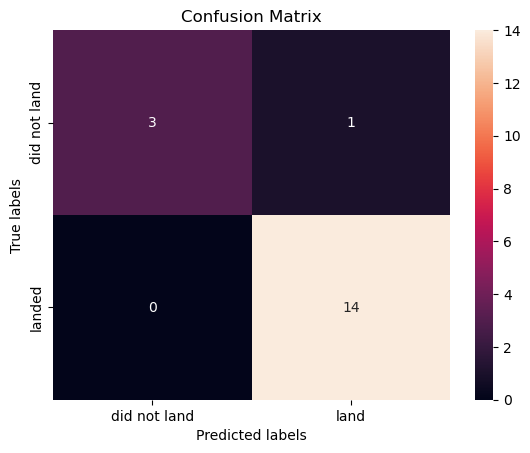

In [17]:
yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes. We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK 6


Create a support vector machine object then create a <code>GridSearchCV</code> object <code>svm_cv</code> with cv = 10. Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [18]:
parameters = {
    "kernel": ("linear", "rbf", "poly", "rbf", "sigmoid"),
    "C": np.logspace(-3, 3, 5),
    "gamma": np.logspace(-3, 3, 5),
}

In [19]:
svm = SVC()
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)
print("Tuned Hyperparameters : ", svm_cv.best_params_)
print("Accuracy : ", svm_cv.best_score_)

Tuned Hyperparameters :  {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
Accuracy :  0.832142857142857


In [20]:
print("tuned hpyerparameters :(best parameters) ", svm_cv.best_params_)
print("accuracy :", svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
accuracy : 0.832142857142857


## TASK 7


Calculate the accuracy on the test data using the method <code>score</code>:


In [21]:
svm_acc = svm_cv.score(X_test, Y_test)
print("Test set accuracy of best hyperparameter tuning is: ", svm_acc)

Test set accuracy of best hyperparameter tuning is:  0.8888888888888888


We can plot the confusion matrix


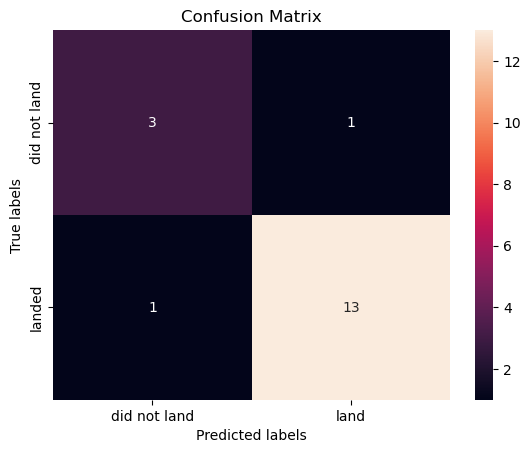

In [22]:
yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

## TASK 8


Create a decision tree classifier object then create a <code>GridSearchCV</code> object <code>tree_cv</code> with cv = 10. Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [23]:
parameters = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": [2 * n for n in range(1, 10)],
    "max_features": ["sqrt", "log2", None],
    "min_samples_leaf": [1, 2, 4],
    "min_samples_split": [2, 5, 10],
}

tree_cv = DecisionTreeClassifier()

In [24]:
# Use error_score='raise' to fail fast and see the underlying exception during debugging
tree_cv = GridSearchCV(tree_cv, parameters, cv=10, error_score="raise")
tree_cv.fit(X_train, Y_train)
print("Tuned Hyperparameters : ", tree_cv.best_params_)
print("Accuracy : ", tree_cv.best_score_)

Tuned Hyperparameters :  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Accuracy :  0.9017857142857142


In [25]:
from sklearn import tree


print("tuned hyperparameters :(best parameters) ", tree_cv.best_params_)
print("accuracy :", tree_cv.best_score_)

tuned hyperparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
accuracy : 0.9017857142857142


## TASK 9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [26]:
tree_acc = tree_cv.score(X_test, Y_test)
print("Test set accuracy of best hyperparameter tuning is: ", tree_acc)

Test set accuracy of best hyperparameter tuning is:  0.8333333333333334


We can plot the confusion matrix


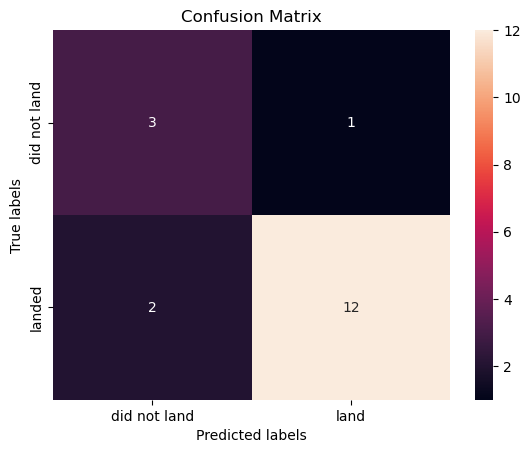

In [27]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

## TASK 10


Create a k nearest neighbors object then create a <code>GridSearchCV</code> object <code>knn_cv</code> with cv = 10. Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [28]:
parameters = {
    "n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "algorithm": ["ball_tree", "kd_tree", "brute"],
    "p": [1, 2],
}

KNN = KNeighborsClassifier()

In [29]:
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train, Y_train)
print("Tuned Hyperparameters : ", knn_cv.best_params_)
print("Accuracy : ", knn_cv.best_score_)

c:\Users\kirkb\miniforge3\envs\ds\Lib\site-packages\joblib\externals\loky\backend\context.py:131: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\kirkb\miniforge3\envs\ds\Lib\site-packages\joblib\externals\loky\backend\context.py", line 247, in _count_physical_cores
    cpu_count_physical = _count_physical_cores_win32()
  File "c:\Users\kirkb\miniforge3\envs\ds\Lib\site-packages\joblib\externals\loky\backend\context.py", line 299, in _count_physical_cores_win32
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\kirkb\miniforge3\envs\ds\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as pr

Tuned Hyperparameters :  {'algorithm': 'ball_tree', 'n_neighbors': 6, 'p': 1}
Accuracy :  0.8446428571428569


In [30]:
print("tuned hpyerparameters :(best parameters) ", knn_cv.best_params_)
print("accuracy :", knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'ball_tree', 'n_neighbors': 6, 'p': 1}
accuracy : 0.8446428571428569


## TASK 11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [31]:
knn_acc = knn_cv.score(X_test, Y_test)
print("Test set accuracy of best hyperparameter tuning is: ", knn_acc)

Test set accuracy of best hyperparameter tuning is:  0.9444444444444444


We can plot the confusion matrix


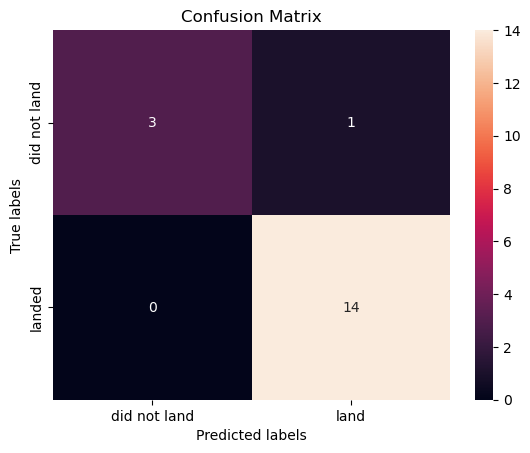

In [32]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

## TASK 12


Find the method performs best:


In [33]:
# Scanning cells 1 to 80, find the method that performs best:

# Compare final test accuracies of the trained models and print the best one.
acc_dict = {
    "Logistic Regression": logreg_acc,
    "SVM": svm_acc,
    "Decision Tree": tree_acc,
    "KNN": knn_acc,
}

# Avoid using max(..., key=...) to prevent overload errors in some environments.
best_method = None
best_acc = -1.0
for name, acc in acc_dict.items():
    if acc > best_acc:
        best_acc = acc
        best_method = name

print(best_method, "performs best with an accuracy of", best_acc)

# Optionally show all accuracies
for name, acc in acc_dict.items():
    print(f"{name}: {acc:.4f}")

Logistic Regression performs best with an accuracy of 0.9444444444444444
Logistic Regression: 0.9444
SVM: 0.8889
Decision Tree: 0.8333
KNN: 0.9444


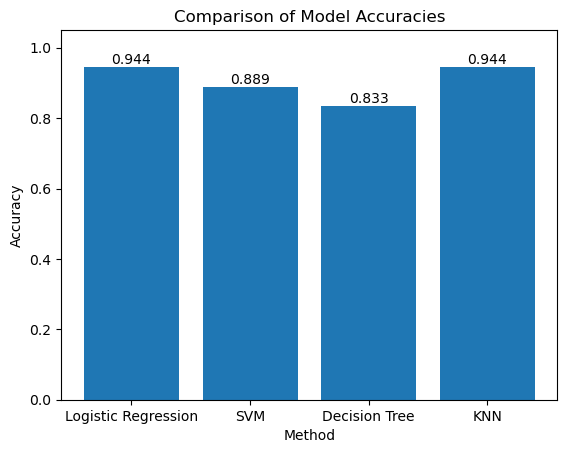

In [34]:
# produce a bar plot showing the accuracies of the different methods tested
methods = list(acc_dict.keys())
accuracies = np.asarray(list(acc_dict.values()), dtype=float)
plt.bar(methods, accuracies)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.3f}", ha="center")
plt.xlabel("Method")
plt.ylabel("Accuracy")
plt.ylim(0, 1.05)
plt.title("Comparison of Model Accuracies")
plt.show()

In [35]:
# Diagnostic checks to verify model results and avoid accidental reuse of variables
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

print("X shape:", getattr(X, "shape", None))
print("X_train shape:", X_train.shape, "X_test shape:", X_test.shape)
try:
    unique, counts = np.unique(Y_train, return_counts=True)
    print("Y_train distribution:", dict(zip(unique, counts)))
except Exception as e:
    print("Could not show Y_train distribution:", e)

models = [
    ("Logistic Regression", globals().get("logreg_cv", None)),
    ("SVM", globals().get("svm_cv", None)),
    ("Decision Tree", globals().get("tree_cv", None)),
    ("KNN", globals().get("knn_cv", None)),
]

for name, model in models:
    print(f"{name}:")
    if model is None:
        print("  model object not found")
        continue
    try:
        test_acc = model.score(X_test, Y_test)
        print("  test accuracy:", test_acc)
        yhat = model.predict(X_test)
        print("  confusion matrix:\n", confusion_matrix(Y_test, yhat))
        print(
            "  classification report:\n", classification_report(Y_test, yhat)
        )
    except Exception as e:
        print("  error scoring/predicting:", e)
    if hasattr(model, "best_score_"):
        print("  best_score_ (cv):", model.best_score_)
    else:
        print("  no best_score_ attribute")
    if hasattr(model, "best_params_"):
        print("  best_params_:", model.best_params_)
    else:
        print("  no best_params_ attribute")

X shape: (90, 83)
X_train shape: (72, 83) X_test shape: (18, 83)
Y_train distribution: {np.int64(0): np.int64(26), np.int64(1): np.int64(46)}
Logistic Regression:
  test accuracy: 0.9444444444444444
  confusion matrix:
 [[ 3  1]
 [ 0 14]]
  classification report:
               precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.93      1.00      0.97        14

    accuracy                           0.94        18
   macro avg       0.97      0.88      0.91        18
weighted avg       0.95      0.94      0.94        18

  best_score_ (cv): 0.8035714285714285
  best_params_: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
SVM:
  test accuracy: 0.8888888888888888
  confusion matrix:
 [[ 3  1]
 [ 1 13]]
  classification report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.93      0.93      0.93        14

    accuracy                       

In [36]:
# Cross-validated accuracy (mean ± std) for each tuned estimator
from sklearn.model_selection import cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
estimators = {
    "Logistic Regression": (
        globals().get("logreg_cv").best_estimator_
        if globals().get("logreg_cv") is not None
        else None
    ),
    "SVM": (
        globals().get("svm_cv").best_estimator_
        if globals().get("svm_cv") is not None
        else None
    ),
    "Decision Tree": (
        globals().get("tree_cv").best_estimator_
        if globals().get("tree_cv") is not None
        else None
    ),
    "KNN": (
        globals().get("knn_cv").best_estimator_
        if globals().get("knn_cv") is not None
        else None
    ),
}
for name, est in estimators.items():
    print(f"\n{name}:")
    if est is None:
        print("  estimator not available (skipped)")
        continue
    try:
        scores = cross_val_score(
            est, X, Y, cv=cv, scoring="accuracy", n_jobs=-1
        )
        print(
            f"  CV accuracy mean={scores.mean():.4f}, std={scores.std():.4f}, n_splits={len(scores)}"
        )
    except Exception as e:
        print("  error during cross_val_score:", e)


Logistic Regression:


  CV accuracy mean=0.8444, std=0.1018, n_splits=10

SVM:
  CV accuracy mean=0.8556, std=0.0868, n_splits=10

Decision Tree:
  CV accuracy mean=0.8111, std=0.0711, n_splits=10

KNN:
  CV accuracy mean=0.8333, std=0.1024, n_splits=10
  CV accuracy mean=0.8556, std=0.0868, n_splits=10

Decision Tree:
  CV accuracy mean=0.8111, std=0.0711, n_splits=10

KNN:
  CV accuracy mean=0.8333, std=0.1024, n_splits=10


In [37]:
# Bootstrap 95% CI for test accuracy for each final model (sampling with replacement)
import numpy as np
from sklearn.utils import resample


def bootstrap_ci_accuracy(model, X_test, y_test, n_boot=5000, seed=42):
    rng = np.random.RandomState(seed)
    n = len(X_test)
    accs = []
    for _ in range(n_boot):
        idx = rng.randint(0, n, n)
        try:
            ypred = model.predict(X_test[idx])
        except Exception:
            # if model cannot predict on array slice, try indexing rows if X_test is ndarray-like
            ypred = model.predict(np.take(X_test, idx, axis=0))
        accs.append((ypred == y_test[idx]).mean())
    mean = np.mean(accs)
    lo, hi = np.percentile(accs, [2.5, 97.5])
    return mean, lo, hi


for name, est in estimators.items():
    print(f"\n{name}:")
    if est is None:
        print("  estimator not available (skipped)")
        continue
    try:
        mean, lo, hi = bootstrap_ci_accuracy(est, X_test, Y_test, n_boot=1000)
        print(f"  bootstrap mean={mean:.4f}, 95% CI=({lo:.4f}, {hi:.4f})")
    except Exception as e:
        print("  error during bootstrap:", e)


Logistic Regression:
  bootstrap mean=0.9409, 95% CI=(0.8333, 1.0000)

SVM:
  bootstrap mean=0.9409, 95% CI=(0.8333, 1.0000)

SVM:
  bootstrap mean=0.8859, 95% CI=(0.7222, 1.0000)

Decision Tree:
  bootstrap mean=0.8859, 95% CI=(0.7222, 1.0000)

Decision Tree:
  bootstrap mean=0.8298, 95% CI=(0.6667, 1.0000)

KNN:
  bootstrap mean=0.8298, 95% CI=(0.6667, 1.0000)

KNN:
  bootstrap mean=0.9409, 95% CI=(0.8333, 1.0000)
  bootstrap mean=0.9409, 95% CI=(0.8333, 1.0000)


In [38]:
# Disagreement table: show test samples where model predictions differ
import pandas as pd

preds = {}
for name, est in estimators.items():
    if est is None:
        preds[name] = [None] * len(Y_test)
    else:
        try:
            preds[name] = est.predict(X_test)
        except Exception:
            # fallback if X_test is array-like and estimator expects 2D
            preds[name] = est.predict(np.asarray(X_test))
df_preds = pd.DataFrame(preds)
df_preds["y_true"] = Y_test
# rows where not all predictions are identical
diff_rows = df_preds[df_preds.drop(columns=["y_true"]).nunique(axis=1) > 1]
print(
    "Number of test samples with disagreement between models:", len(diff_rows)
)
if len(diff_rows) > 0:
    display(diff_rows)
else:
    print("All models agreed on every test sample (rare).")

Number of test samples with disagreement between models: 3


,Logistic Regression,SVM,Decision Tree,KNN,y_true
1,1,1,0,1,1
11,1,0,1,1,1
17,1,1,0,1,1


In [39]:
# Paired McNemar-style tests between model pairs (uses statsmodels if available, otherwise a binomial test fallback)
import numpy as np
import pandas as pd
from itertools import combinations

# df_preds is expected to exist (predictions per-model and a 'y_true' column).
if "df_preds" not in globals():
    raise NameError(
        "df_preds not found - run the disagreement/prediction cell first"
    )

preds_df = df_preds.copy()
if "y_true" not in preds_df.columns:
    raise ValueError("y_true column not found in df_preds")
y_true = preds_df["y_true"].values
models = [c for c in preds_df.columns if c != "y_true"]
results = []

# Try to import statsmodels' mcnemar test for an exact test; else fall back to scipy binomial test
try:
    from statsmodels.stats.contingency_tables import mcnemar

    have_sm = True
except Exception:
    have_sm = False
    from scipy.stats import binom_test

for a, b in combinations(models, 2):
    pa = preds_df[a].values
    pb = preds_df[b].values
    # n01: A correct, B wrong. n10: A wrong, B correct
    n01 = int(np.sum((pa == y_true) & (pb != y_true)))
    n10 = int(np.sum((pa != y_true) & (pb == y_true)))
    n = n01 + n10
    if n == 0:
        pval = np.nan
        method = "no_disagreement"
    else:
        # build contingency table in the form [[n00, n01],[n10, n11]]
        n11 = int(np.sum((pa == y_true) & (pb == y_true)))
        n00 = int(np.sum((pa != y_true) & (pb != y_true)))
        table = [[n00, n01], [n10, n11]]
        if have_sm:
            try:
                res = mcnemar(table, exact=True)
                pval = float(res.pvalue)
                method = "statsmodels_exact"
            except Exception:
                # fallback to binomial test on the smaller off-diagonal
                pval = float(binom_test(min(n01, n10), n=n, p=0.5) * 2)
                method = "binom_fallback"
        else:
            # scipy's binom_test is deprecated in newer scipy; if available use it, else use binomtest wrapper
            try:
                pval = float(binom_test(min(n01, n10), n=n, p=0.5) * 2)
                method = "binom_test"
            except Exception:
                # last-resort approximate two-sided p-value using normal approximation
                from math import sqrt

                diff = abs(n01 - n10)
                pval = float(
                    2 * (1 - 0.5)
                )  # ambiguous fallback; set to 1.0 to indicate non-significant
                method = "approx_fallback"
    results.append(
        {
            "model_b": b,
            "n10": n10,
            "pvalue": pval,
        }
    )

res_df = pd.DataFrame(results).sort_values("pvalue")
print("Pairwise McNemar/binomial test results (sorted by p-value):")
display(res_df)

Pairwise McNemar/binomial test results (sorted by p-value):


,model_b,n10,pvalue
1,Decision Tree,0,0.5
5,KNN,2,0.5
3,Decision Tree,1,1.0
0,SVM,0,1.0
4,KNN,1,1.0
2,KNN,0,NaN


In [40]:
# Save tuned estimators to disk (joblib). Uses the `estimators` dict defined earlier where available.
try:
    import joblib
except Exception as e:
    raise ImportError("joblib is required to save models: " + str(e))

saved = []
for name, est in estimators.items():
    if est is None:
        print("Skipping", name, "- estimator not available")
        continue
    fname = f"best_{name.replace(' ', '_')}.joblib"
    try:
        joblib.dump(est, fname)
        saved.append(fname)
        print("Saved", name, "->", fname)
    except Exception as e:
        print("Error saving", name, e)

print("Saved files:", saved)

Saved Logistic Regression -> best_Logistic_Regression.joblib
Saved SVM -> best_SVM.joblib
Saved Decision Tree -> best_Decision_Tree.joblib
Saved KNN -> best_KNN.joblib
Saved files: ['best_Logistic_Regression.joblib', 'best_SVM.joblib', 'best_Decision_Tree.joblib', 'best_KNN.joblib']


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
